In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# define the function 
def f(x):
    k = len(x)
    return 0.5 * np.sum(x * (x - 1)) + 0.5 * k * (k - 1)

def generate_pre_cluster_sets(n, k, alpha_param):
    # generate Dirichlet parameters for this k
    alpha = np.full(k, alpha_param)

    # sample probabilities from Dirichlet distribution
    probabilities = np.random.dirichlet(alpha)

    # sample x_i values from multinomial distribution
    x = np.random.multinomial(n, probabilities)

    return x

def evaluate_f_avg(n, k_range, k_iterations, alpha_param):
    f_avg_values = []

    # Step 1 -> sampling and evaluation
    for i, k in enumerate(range(k_range[0], k_range[1] + 1)):

        f_values = []

        for _ in range(k_iterations):
            x = generate_pre_cluster_sets(n, k, alpha_param)
            f_values.append(f(x))

        f_avg = np.mean(f_values)
        f_avg_values.append((k, f_avg))
        
    
    # Step 2 -> finding k that minimizes f_avg
    f_avg_values.sort(key=lambda x: x[1])  # sort by f_avg in ascending order
    best_k_values = [x[0] for x in f_avg_values[:10]] # take top10 values

    return best_k_values, f_avg_values

def run_simulations(n, n_iterations, k_iterations, k_range, alpha_param):
    optimal_k_values = []
    in_interval_counts = 0

    # run simulations and record optimal k values
    for i in range(n_iterations):
        best_k_values, _ = evaluate_f_avg(n, k_range, k_iterations, alpha_param)
        optimal_k_values.extend(best_k_values)

        for value in best_k_values:
            if value in range(interval[0], interval[1] + 1):
                in_interval_counts += 1

    # compute statistics
    mean_val = np.mean(optimal_k_values)
    
    return mean_val

def alpha_shift_simulation(n, n_iterations, k_iterations, k_range, alphas):
    means = []
    
    for alpha in alphas:
        mean_val = run_simulations(n, n_iterations, k_iterations, k_range, alpha)
        means.append(mean_val)
        
    return means


def plot_alpha_shift_on_k(means, alphas, interval):
    plt.figure(figsize=(14, 10))  
    
    colors = sns.color_palette("coolwarm", len(alphas))
    
    for i, (alpha, mean) in enumerate(zip(alphas, means)):
        plt.scatter(mean, i, color=colors[i], s=150, marker='o', alpha=0.7)  
        plt.annotate(f"α={alpha}", (mean, i), textcoords="offset points", xytext=(0,10), ha='center', fontsize=14)  # Increased font size for labels
        
        plt.axhline(i, color='grey', linestyle='-', linewidth=1, xmin=0.05, xmax=0.95)  
    
    plt.axvline(x=interval[0], color='red', linestyle='--', linewidth=2)
    plt.axvline(x=interval[1], color='red', linestyle='--', linewidth=2)  
    
    # adjusting labels, title, and ticks
    plt.xlabel('k', fontsize=18)  
    plt.yticks([])  
    
    # style
    sns.set(style='darkgrid')
    plt.grid(True, linestyle='dotted', alpha=0.5, color='black')
    plt.xlim(260, 480)
    
    plt.grid(True, which="both", ls="--", c='0.7')
    plt.tight_layout()
    
    #plt.savefig('meanshift.png', dpi=300, facecolor='white')  # Save the plot with higher resolution
    
    plt.show()

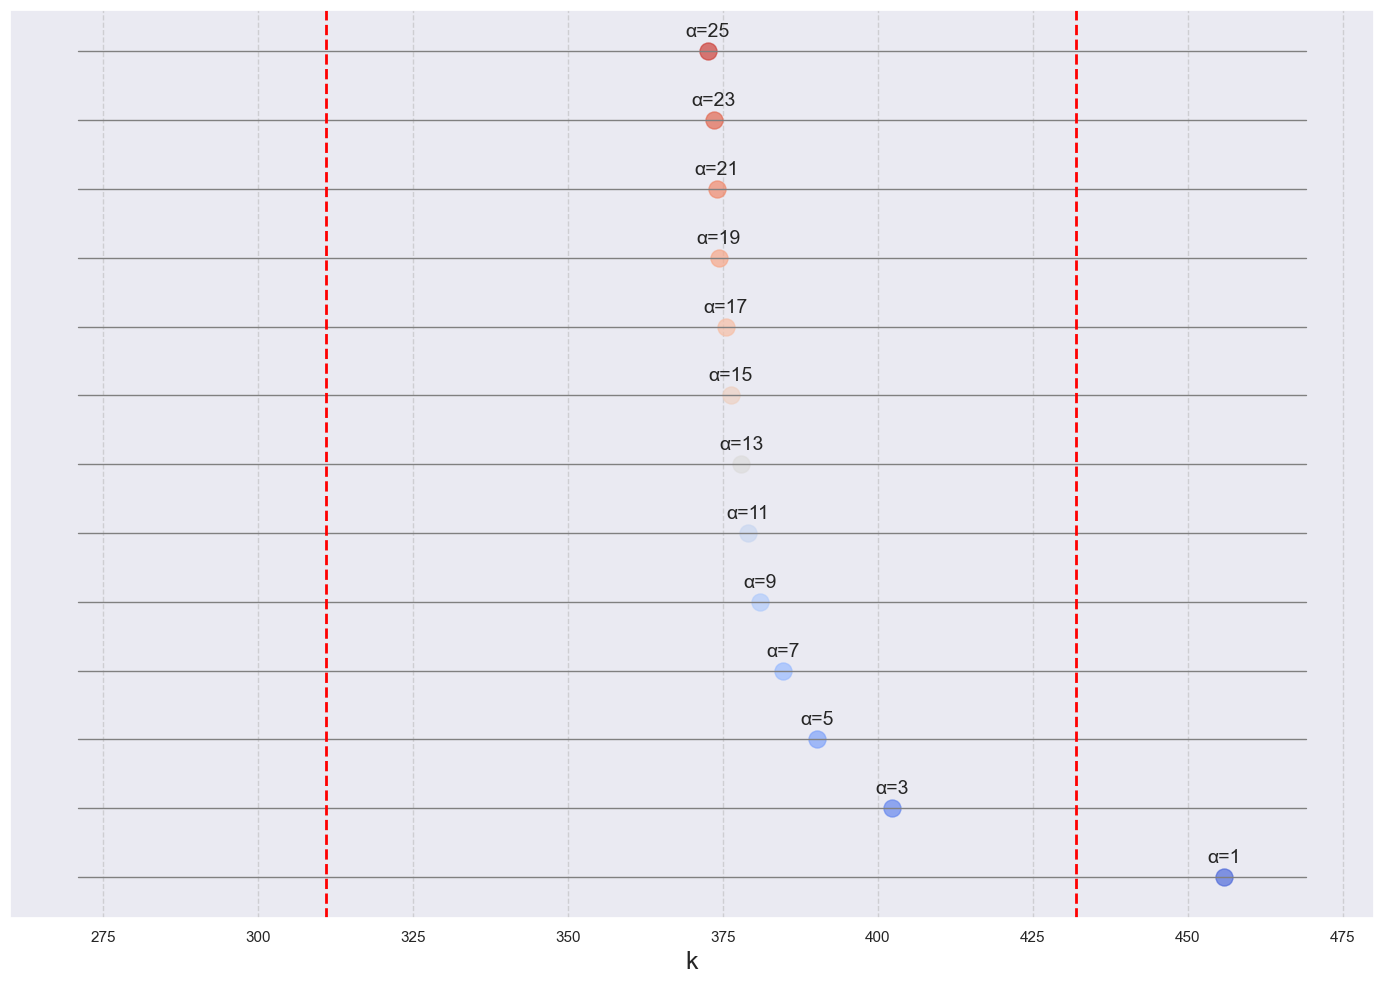

In [3]:
# ADJUST PARAMETERS HERE

n = 10000
n_iterations = 70
k_iterations = 4
k_range = (350, 650)
alphas = [1,3,5,7, 9, 11, 13, 15, 17, 19, 21, 23, 25]

# define interval
lower_coefficients = np.array([0.59152719,  0.68053571])
upper_coefficients = np.array([1.05171082, 0.6534756])
lower_bound = lower_coefficients[0] * n ** lower_coefficients[1]
upper_bound = upper_coefficients[0] * n ** upper_coefficients[1]
interval = (int(lower_bound), int(upper_bound))

# run the simulations
means = alpha_shift_simulation(n, n_iterations, k_iterations, k_range, alphas)

# plot the results
plot_alpha_shift_on_k(means, alphas, interval)
